**Project Title:**

Marketing Campaign for Banking Products
Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.
Data: https:/*italicized text*

In [ ]:
import pandas as pd
import numpy as np
# importing required modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#to use plotlib in object oriented way use go  means plotlib .graph object
plt.rcParams['figure.figsize']=17,20
import cufflinks as cf
#for binding pandas and plotlib together
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium
#for roundup circle

#pandas- In particular, it offers data structures and operations for manipulating numerical tables and time series
numpy-NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
matplotlib-Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython.

In [ ]:
#two modules


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**importing data**


Importing Data
Use these commands to import data from a variety of different sources and formats.

pd.read_csv(filename) | From a CSV file
pd.read_table(filename) | From a delimited text file (like TSV)
pd.read_excel(filename) | From an Excel file
pd.read_sql(query, connection_object) | Read from a SQL table/database
pd.read_json(json_string) | Read from a JSON formatted string, URL or file.
pd.read_html(url) | Parses an html URL, string or file and extracts tables to a list of dataframes
pd.read_clipboard() | Takes the contents of your clipboard and passes it to read_table()
pd.DataFrame(dict) | From a dict, keys for columns names, values for data as lists



In [6]:

#import dataset
data = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

#just check
data.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Viewing/Inspecting Data**
Use these commands to take a look at specific sections of your pandas DataFrame or Series.

df.head(n) | First n rows of the DataFrame
df.tail(n) | Last n rows of the DataFrame
df.shape | Number of rows and columns
df.info() | Index, Datatype and Memory information
df.describe() | Summary statistics for numerical columns
s.value_counts(dropna=False) | View unique values and counts
df.apply(pd.Series.value_counts) | Unique values and counts for all columns


In [ ]:
#show last 5 rows
data.tail() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
# to display name of coloum and row

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**DATA CLEANING-**

Data Cleaning
Use these commands to perform a variety of data cleaning tasks.

df.columns = ['a','b','c'] | Rename columns
pd.isnull() | Checks for null Values, Returns Boolean Arrray
pd.notnull() | Opposite of pd.isnull()
df.dropna() | Drop all rows that contain null values
df.dropna(axis=1) | Drop all columns that contain null values
df.dropna(axis=1,thresh=n) | Drop all rows have have less than n non null values
df.fillna(x) | Replace all null values with x
s.fillna(s.mean()) | Replace all null values with the mean (mean can be replaced with almost any function from the statistics module)
s.astype(float) | Convert the datatype of the series to float
s.replace(1,'one') | Replace all values equal to 1 with 'one'
s.replace([1,3],['one','three']) | Replace all 1 with 'one' and 3 with 'three'
df.rename(columns=lambda x: x + 1) | Mass renaming of columns
df.rename(columns={'old_name': 'new_ name'}) | Selective renaming
df.set_index('column_one') | Change the index
df.rename(index=lambda x: x + 1) | Mass renaming of index

In [ ]:
#checking null value must imp
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#corealation betwennn age and experience because age and exprience are dependent variable

experience=data['Experience']
age=data['Age']
correalation=experience.corr(age)

In [ ]:
correalation

0.9942148569683321

**Statistic**s


Use these commands to perform various statistical tests. (These can all be applied to a series as well.)


df.describe() | Summary statistics for numerical columns
df.mean() | Returns the mean of all columns
df.corr() | Returns the correlation between columns in a DataFrame
df.count() | Returns the number of non-null values in each DataFrame column
df.max() | Returns the highest value in each column
df.min() | Returns the lowest value in each column
df.median() | Returns the median of each column
df.std() | Returns the standard deviation of each column

In [ ]:
#mean mode median certain layer outlayer this is most imp layer so we transform below
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



DROPPING-

DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')[source]
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. When using a multi-index, labels on different levels can be removed by specifying the level.

Parameters
labelssingle label or list-like
Index or column labels to drop.

axis{0 or ‘index’, 1 or ‘columns’}, default 0
Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

indexsingle label or list-like
Alternative to specifying axis (labels, axis=0 is equivalent to index=labels).

columnssingle label or list-like
Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).

In [ ]:
#droping an id experience AXIS 1 is for coloum

data=data.drop(['ID','Experience'],axis=1)

In [ ]:
data.head(5)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [ ]:

#CHECK THE SHAPE
data.shape 

(5000, 14)

 3RD STEP-
  
  ** EDA**

  
1.1.1.
What is EDA?
Approach	Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
maximize insight into a data set;
uncover underlying structure;
extract important variables;
detect outliers and anomalies;
test underlying assumptions;
develop parsimonious models; and
determine optimal factor settings.
Focus	The EDA approach is precisely that--an approach--not a set of techniques, but an attitude/philosophy about how a data.




nunique() would return the number of unique elements in each column

Count of the historical and active state, (we need only analyze the active state products):

In [ ]:
data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**dropping zip code since there are so much differences**

In [ ]:
data=data.drop(['ZIP Code'],axis=1)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**A** mortgage is a loan from a bank or lender to help you finance the purchase of a home. When you take out a mortgage, you make a promise to repay the money you've borrowed, plus an agreed-upon interest rate.

In [ ]:
print('people with 0 mortrage =',len(data[data.Mortgage==0]));

people with 0 mortrage = 3462


In [ ]:
print('people with 0 credit card average =',len(data[data.CCAvg==0]));

people with 0 credit card average = 106


In [ ]:
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
# we do using another method also
#because if you see for all step we need 10 step but if we use for lopp is just in one step
for column in data.columns:
    print(f' Unique values in {column} is {len(data[column].unique())}')

 Unique values in ID is 5000
 Unique values in Age is 45
 Unique values in Experience is 47
 Unique values in Income is 162
 Unique values in ZIP Code is 467
 Unique values in Family is 4
 Unique values in CCAvg is 108
 Unique values in Education is 3
 Unique values in Mortgage is 347
 Unique values in Personal Loan is 2
 Unique values in Securities Account is 2
 Unique values in CD Account is 2
 Unique values in Online is 2
 Unique values in CreditCard is 2


In [9]:
#i get error sns not define so add it here

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



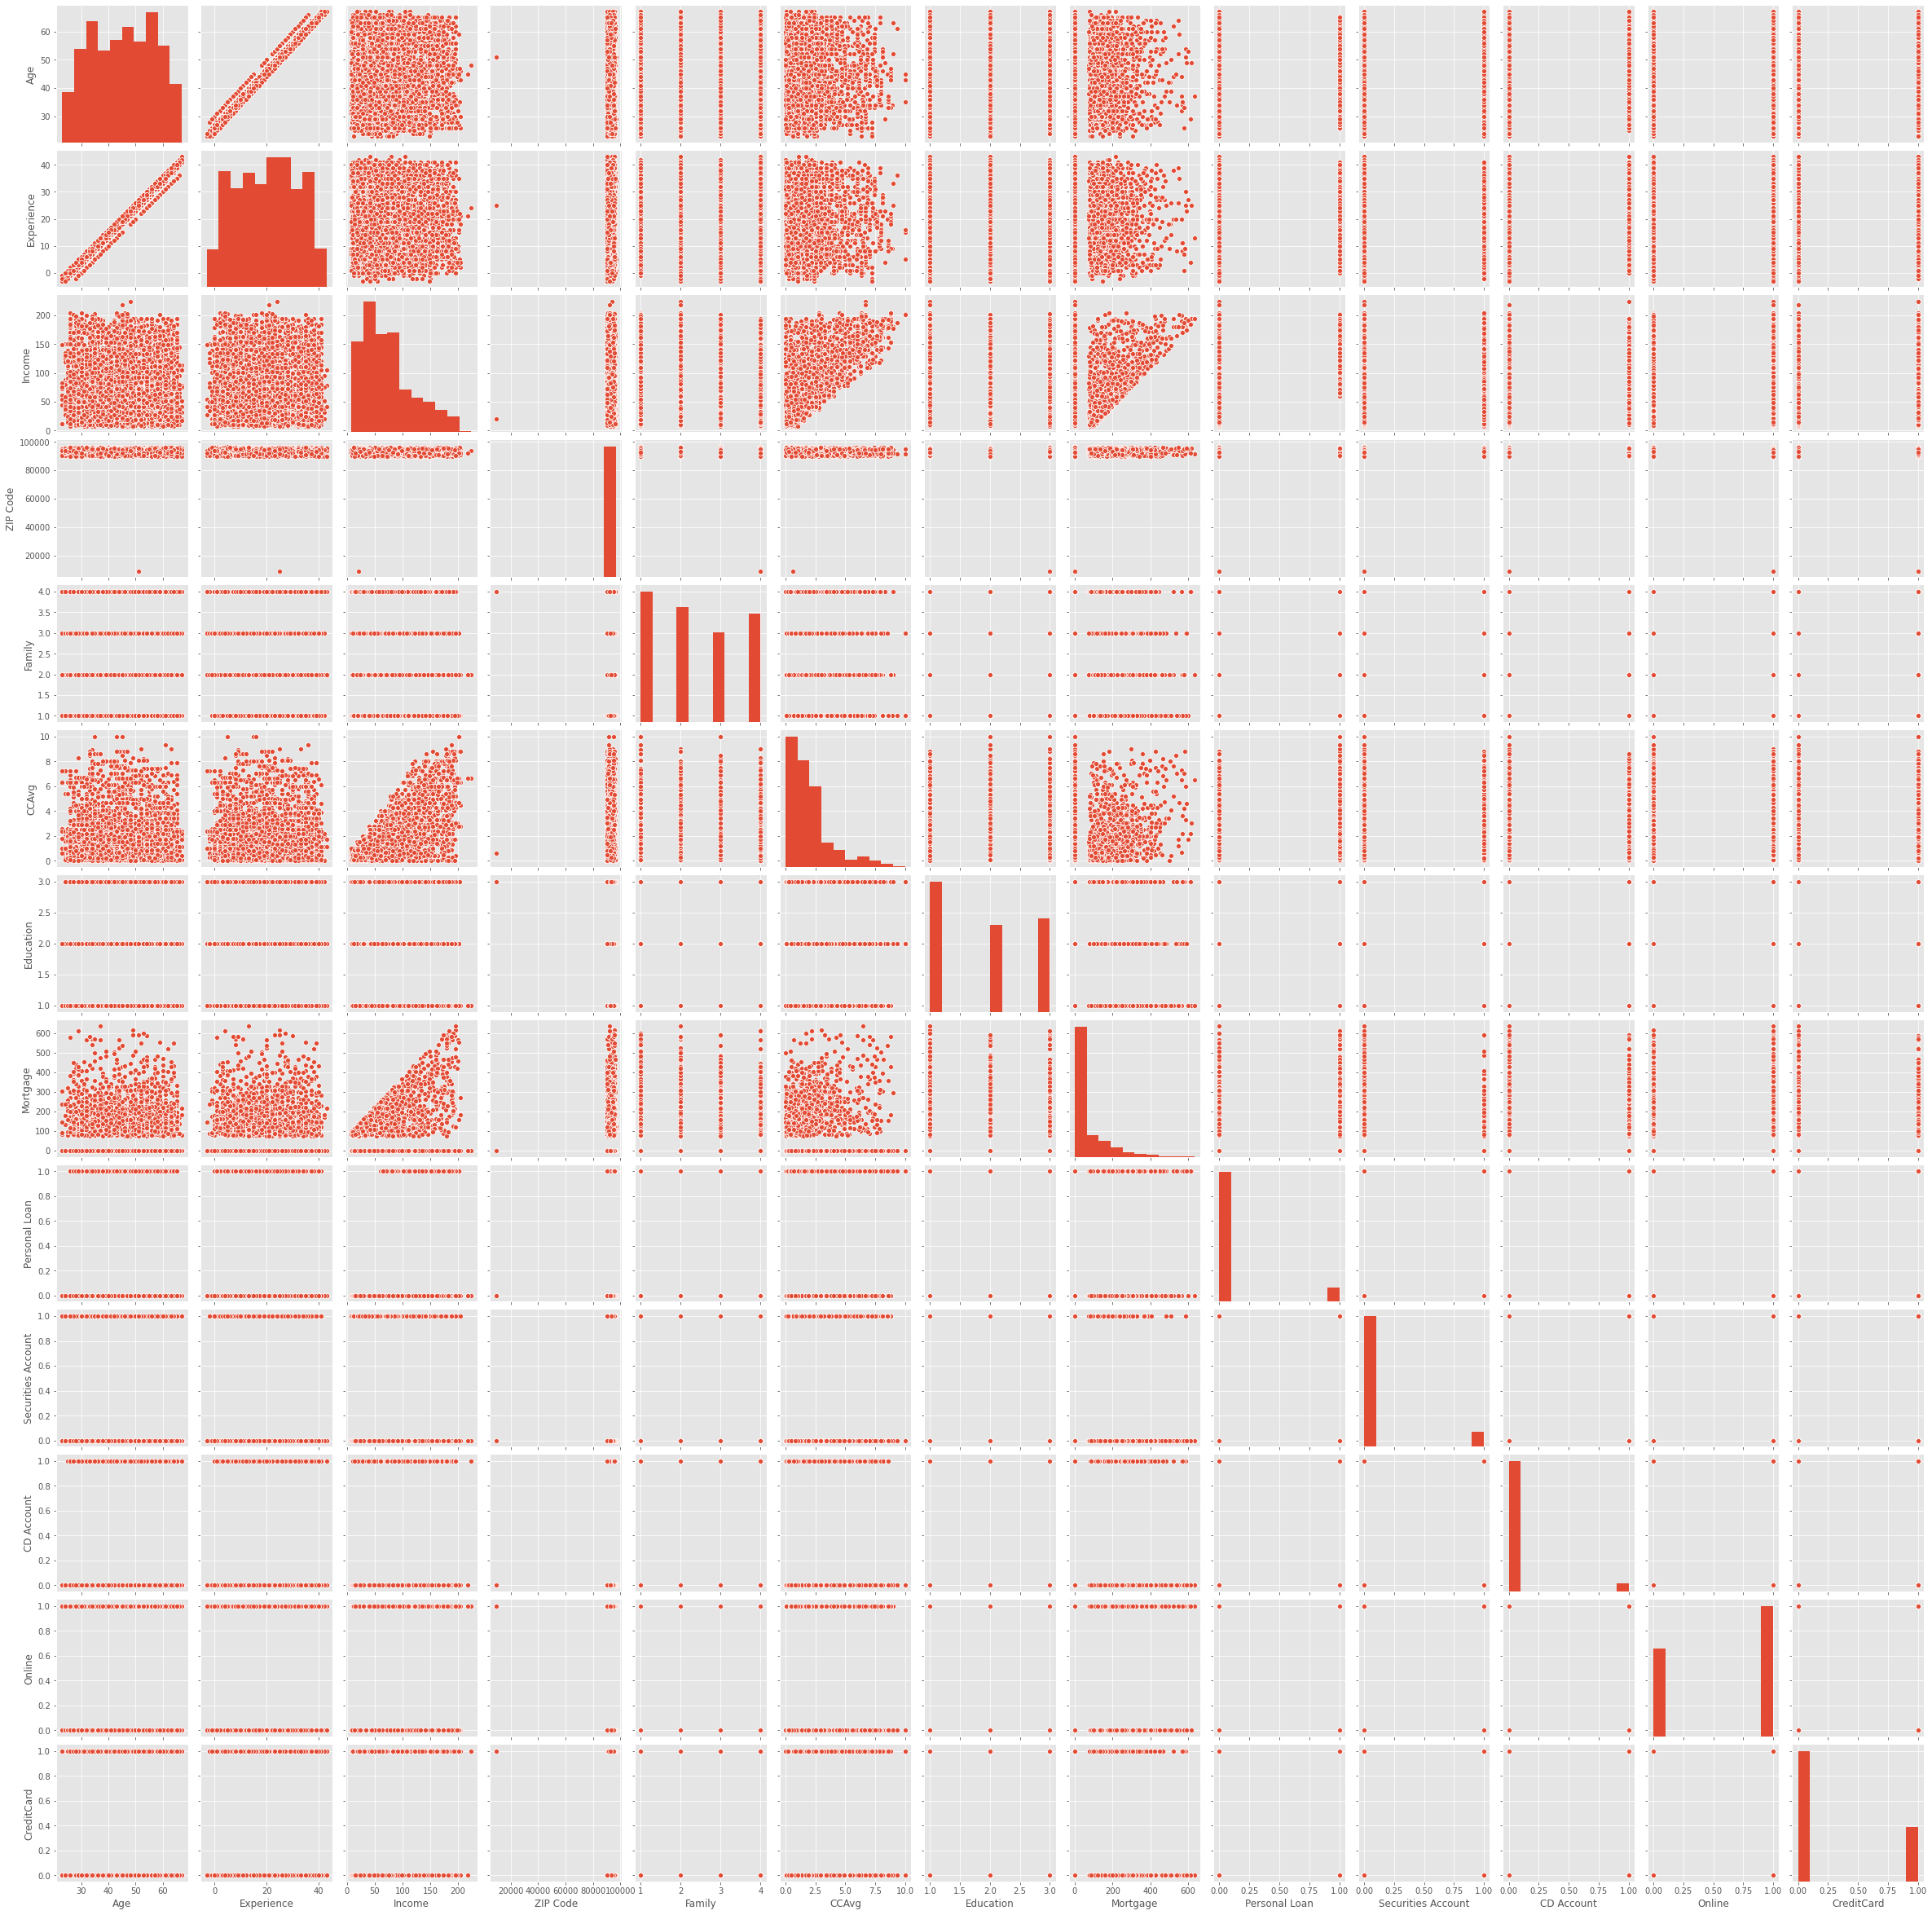

In [ ]:


sns.pairplot(data.iloc[:,1:])

univariate analysis

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data



Parameters
styledict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
A dictionary of parameters or the name of a preconfigured set.

rcdict, optional
Parameter mappings to override the values in the preset seaborn style dictionaries. This only updates parameters that are considered part of the style definition.

In [ ]:
#seaborn.set_style(style=None, rc=None)


sns.set_style(style='white')

# seaborn.distplot


This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

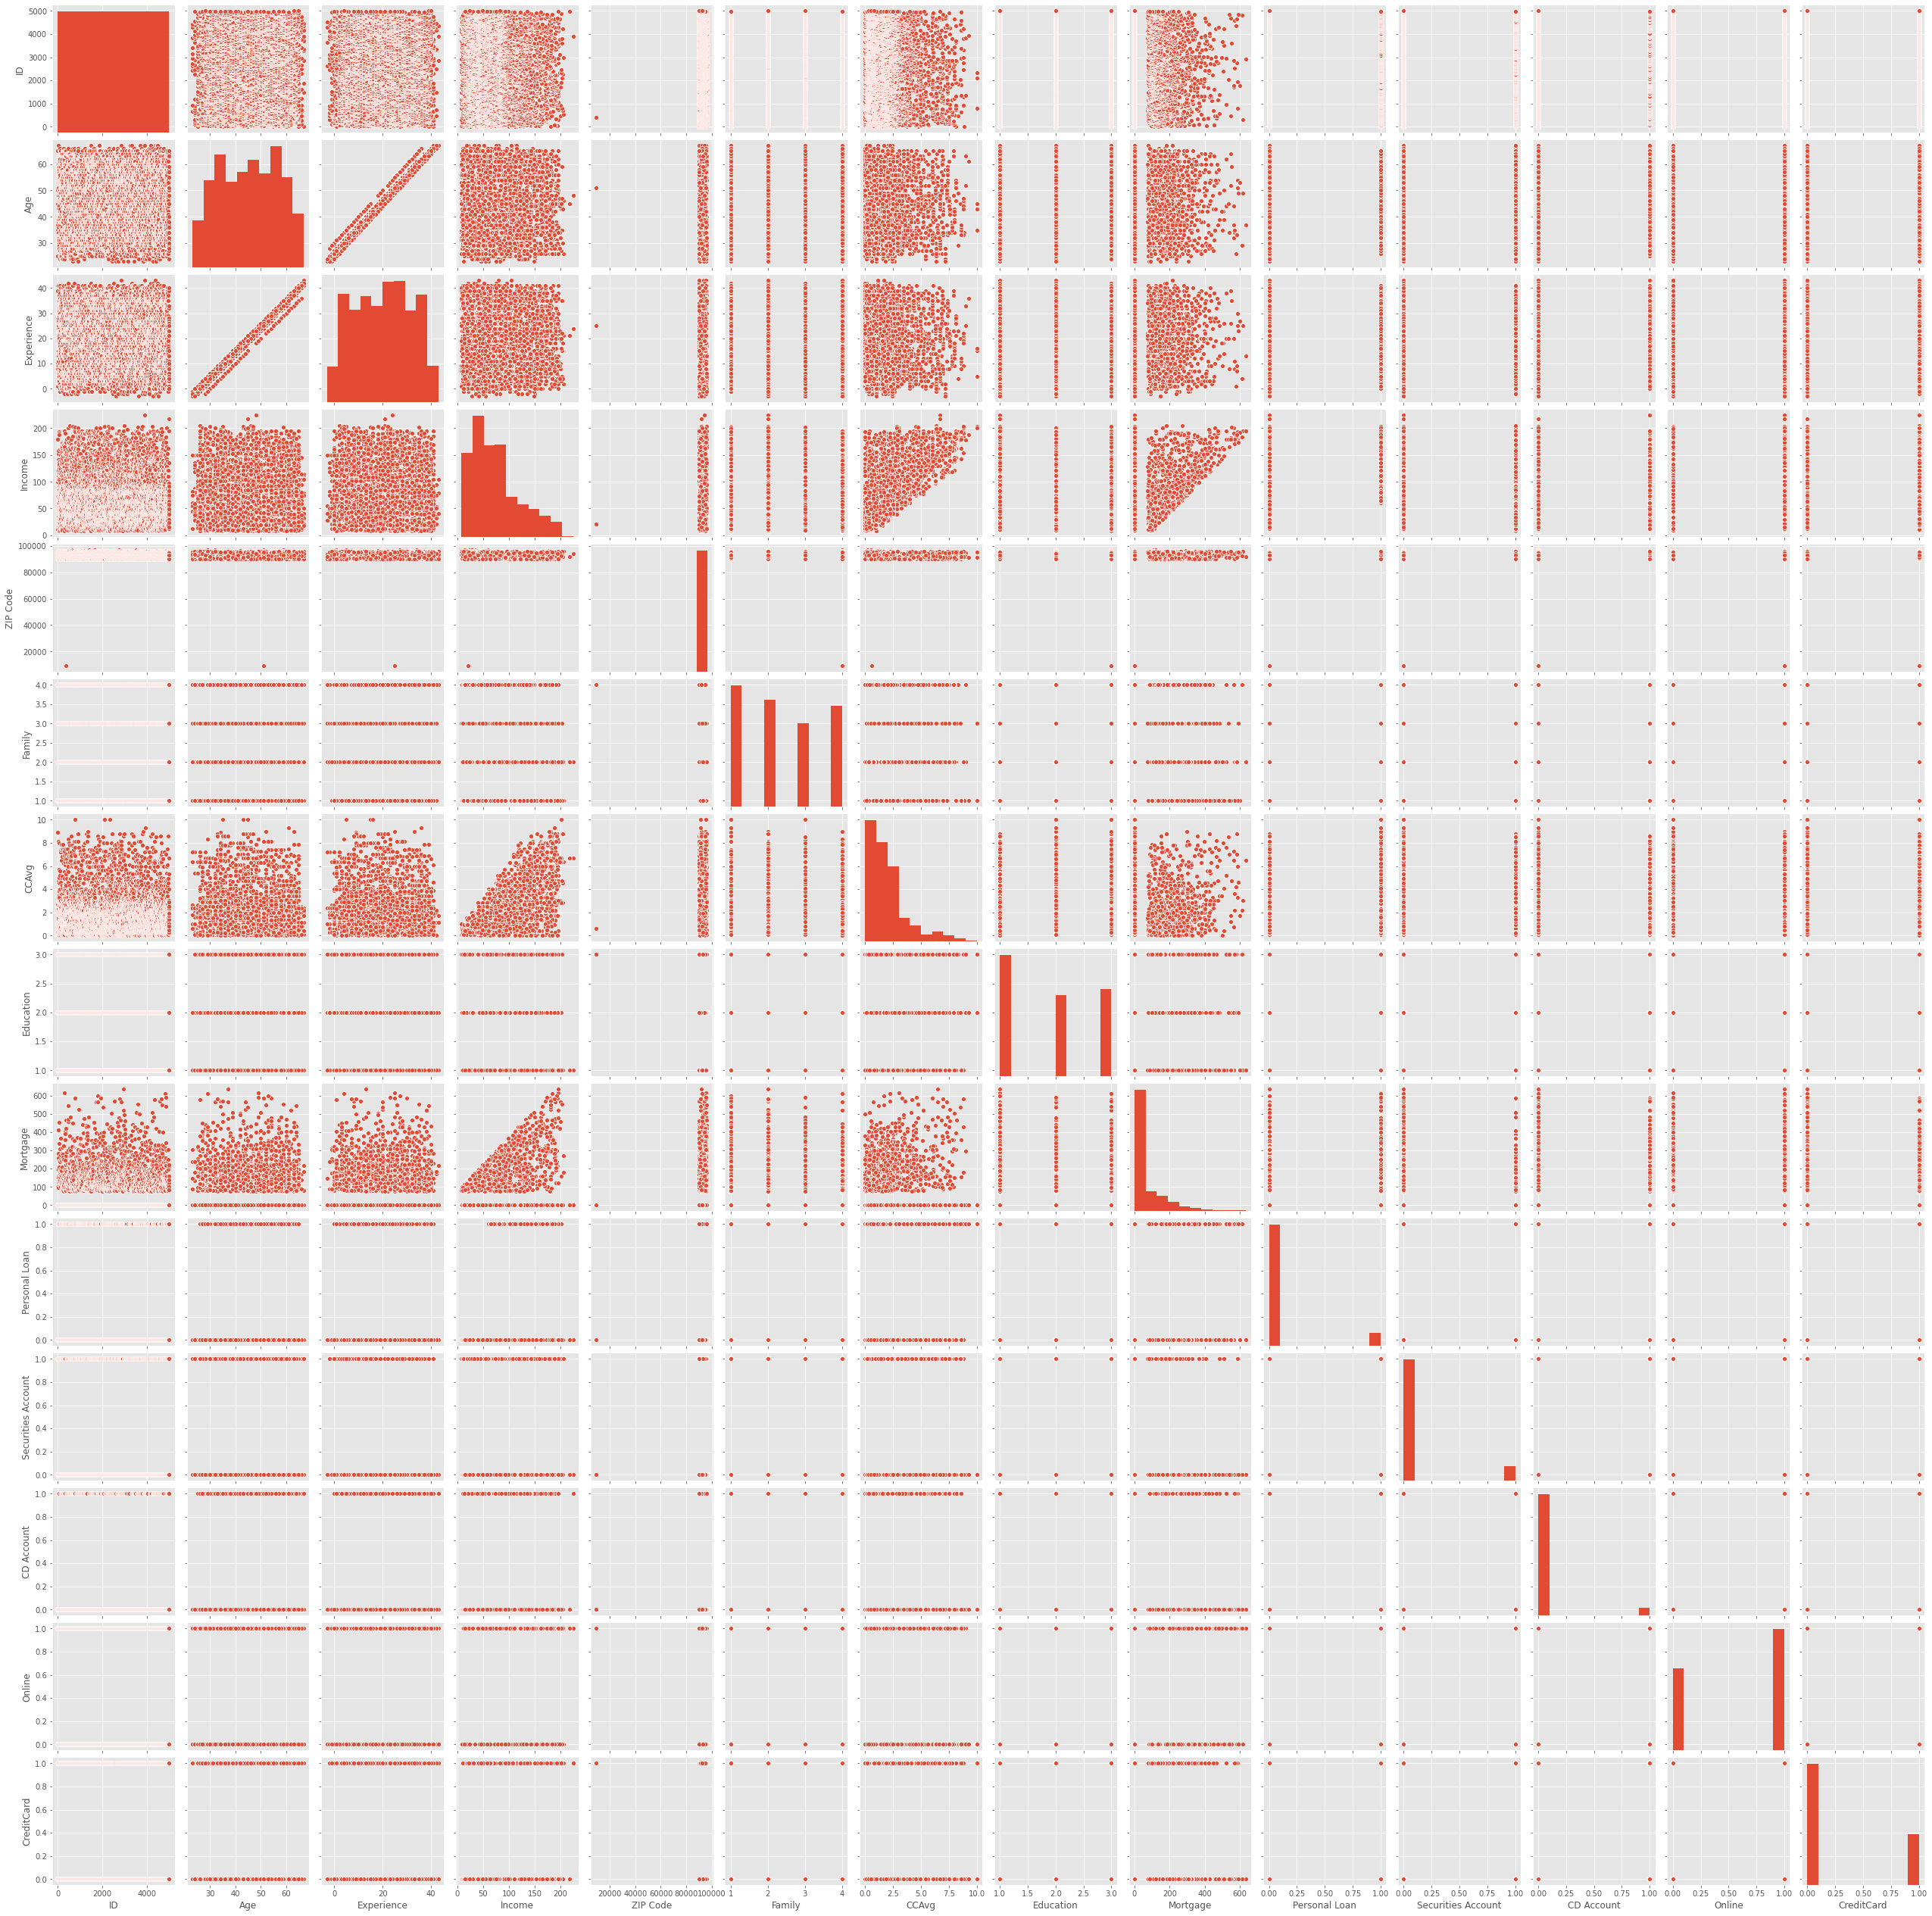

In [ ]:
sns.pairplot(data)

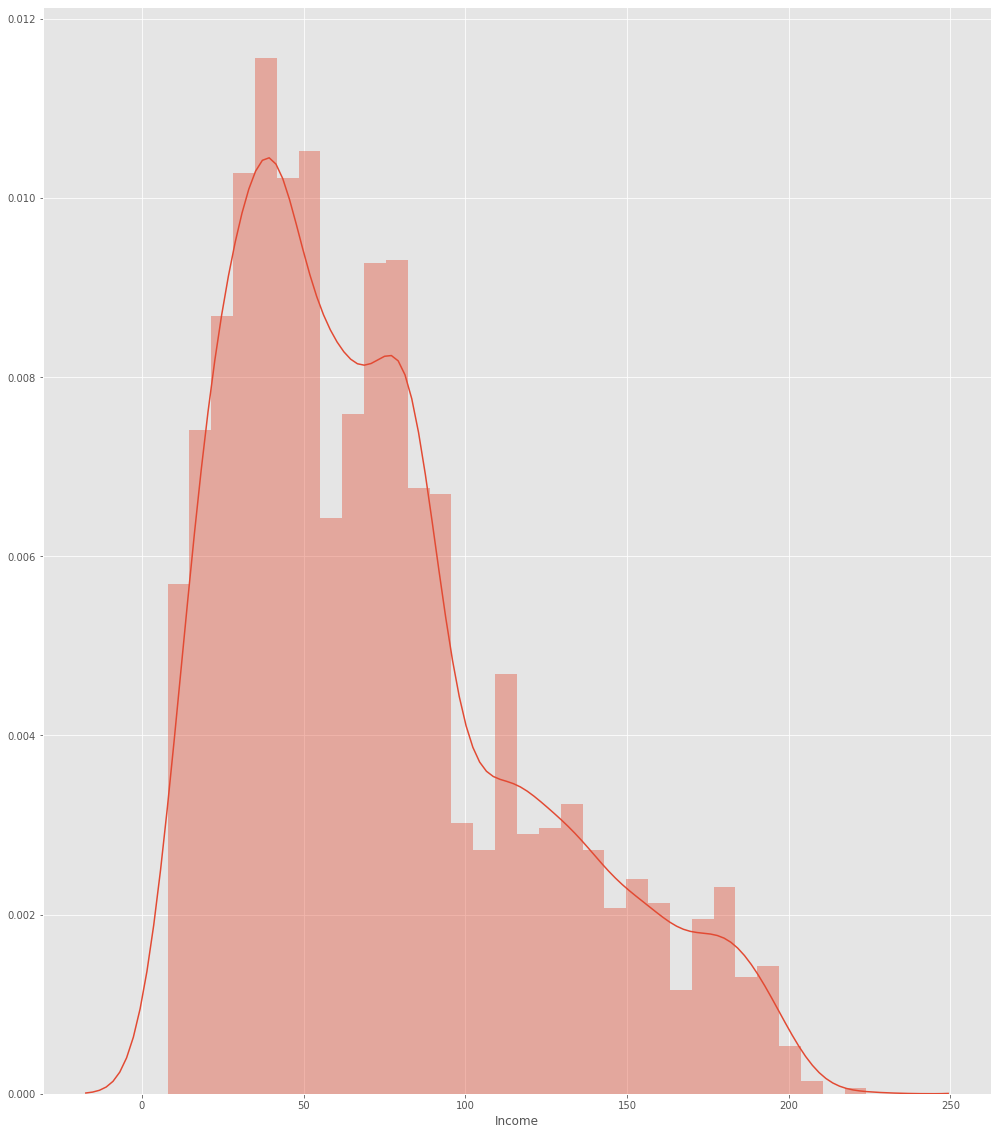

In [11]:
sns.distplot(data.Income);

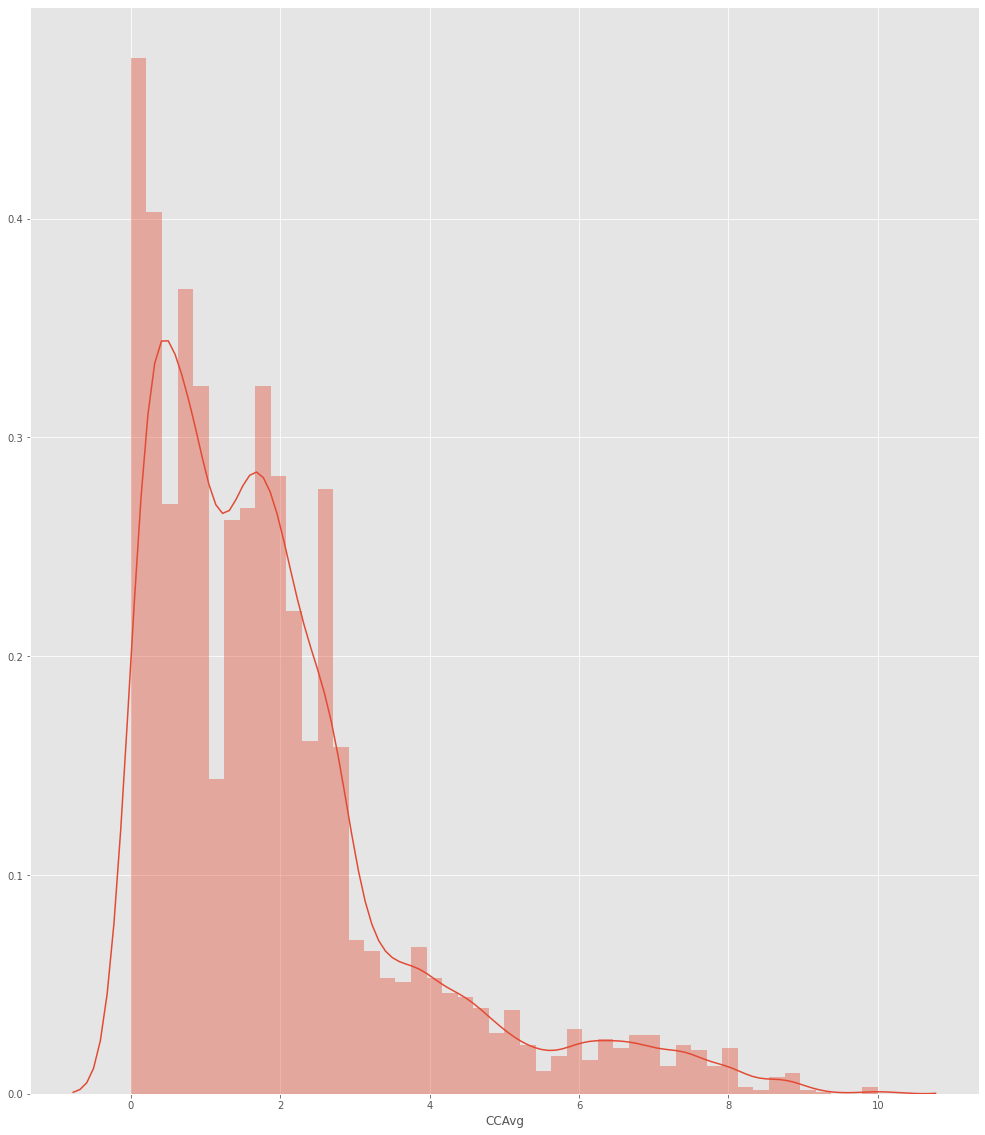

In [10]:
sns.distplot(data.CCAvg);

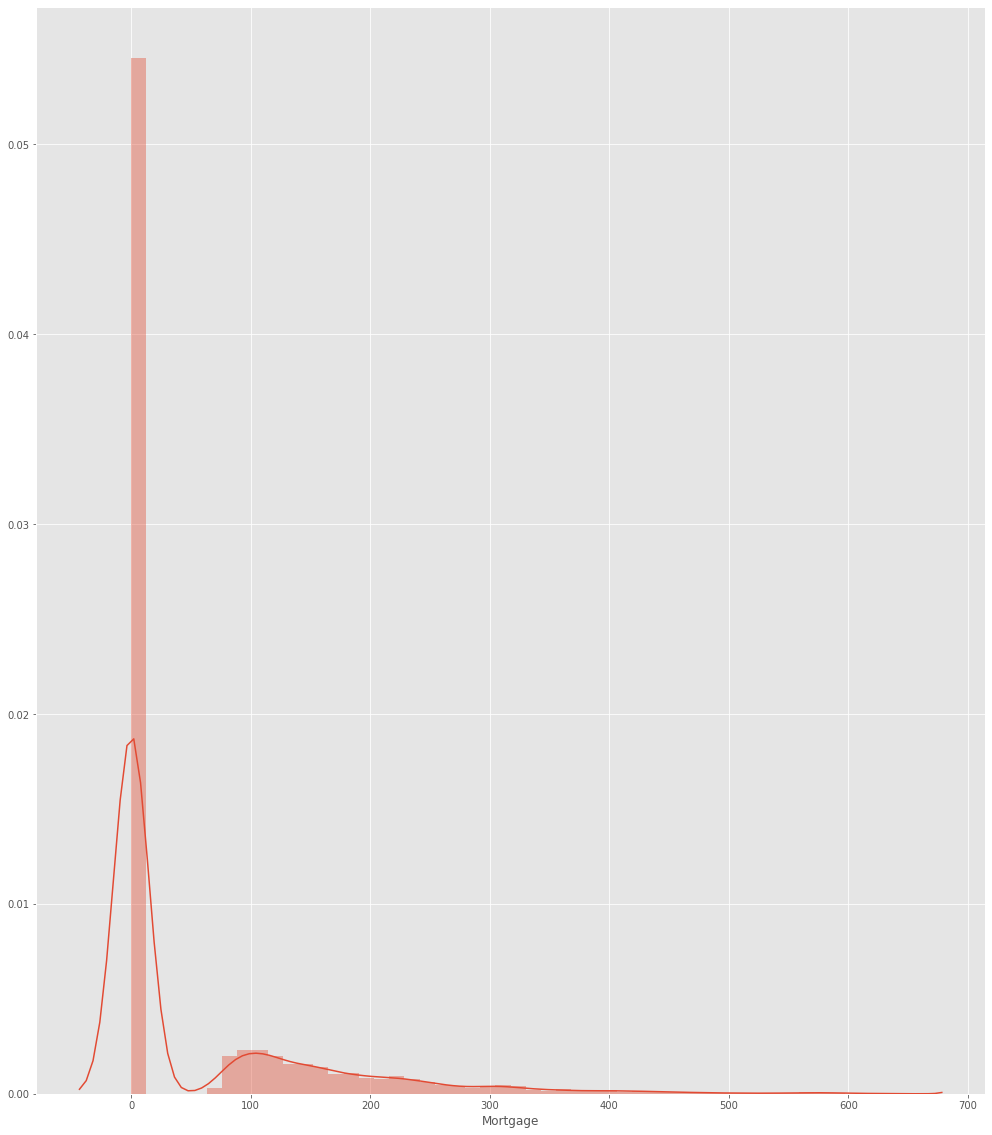

In [12]:
sns.distplot(data.Mortgage);

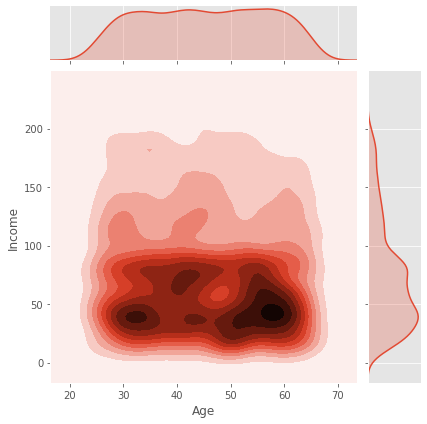

In [ ]:
#showing the age at income

sns.jointplot(x="Age", y="Income", data=data, kind="kde");

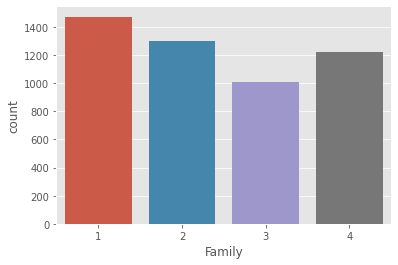

In [ ]:
sb.countplot(data.Family);

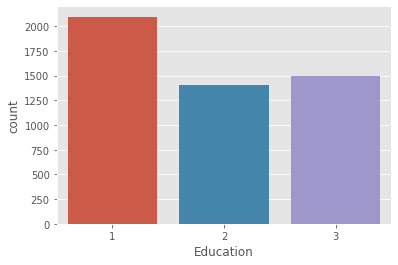

In [ ]:
sb.countplot(data.Education);

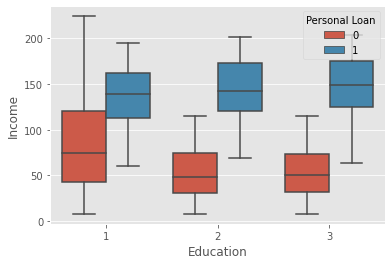

In [ ]:
sb.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

Education have nothing to do with personal loan but income above 100 are availing it-

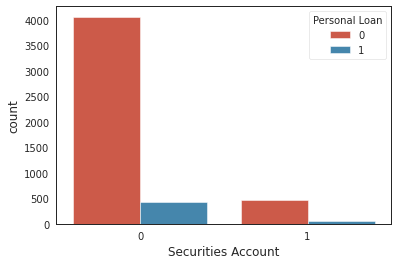

In [ ]:
sb.countplot(x="Securities Account", data=data,hue="Personal Loan")

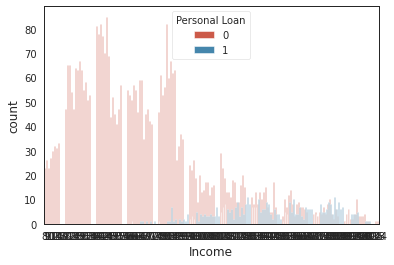

In [ ]:
sb.countplot(x="Income", data=data,hue="Personal Loan")


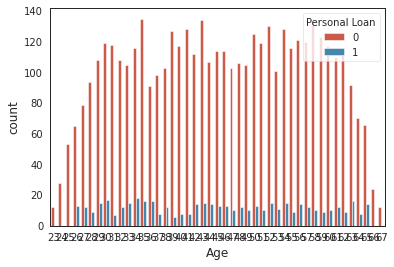

In [ ]:
#sb.countplot(x="Age", data=data,hue="Personal Loan")

In [ ]:



print('Number of people with zero mortgage:',len(data[data['Mortgage']==0]))

Number of people with zero mortgage: 3462


In [ ]:
## people with zero cc spending per month

print('Number of people with zero Credit Card spending per month:', len(data[data['CCAvg']==0]))

Number of people with zero Credit Card spending per month: 106


In [ ]:
data['CCAvg'].value_counts()

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.200000      1
5.333333      1
4.666667      1
8.900000      1
9.300000      1
Name: CCAvg, Length: 108, dtype: int64

In [ ]:



categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

for column in categorical_columns:
    print(f'Value counts for {column} column:')
    print(data[column].value_counts())
    print()

Value counts for Family column:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64

Value counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

Value counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64

Value counts for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64

Value counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64



(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

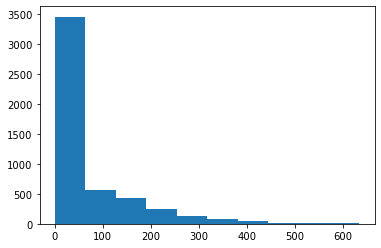

In [ ]:
plt.hist(data['Mortgage'])

**Multivariate Analysis**

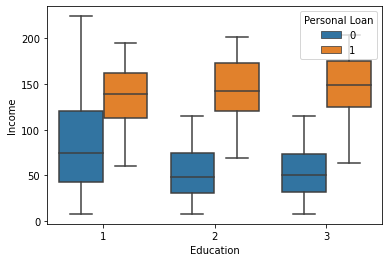

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)


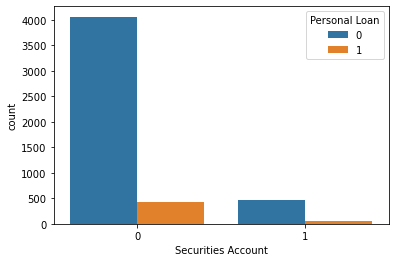

In [ ]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")


**People with more income have availed the loan**

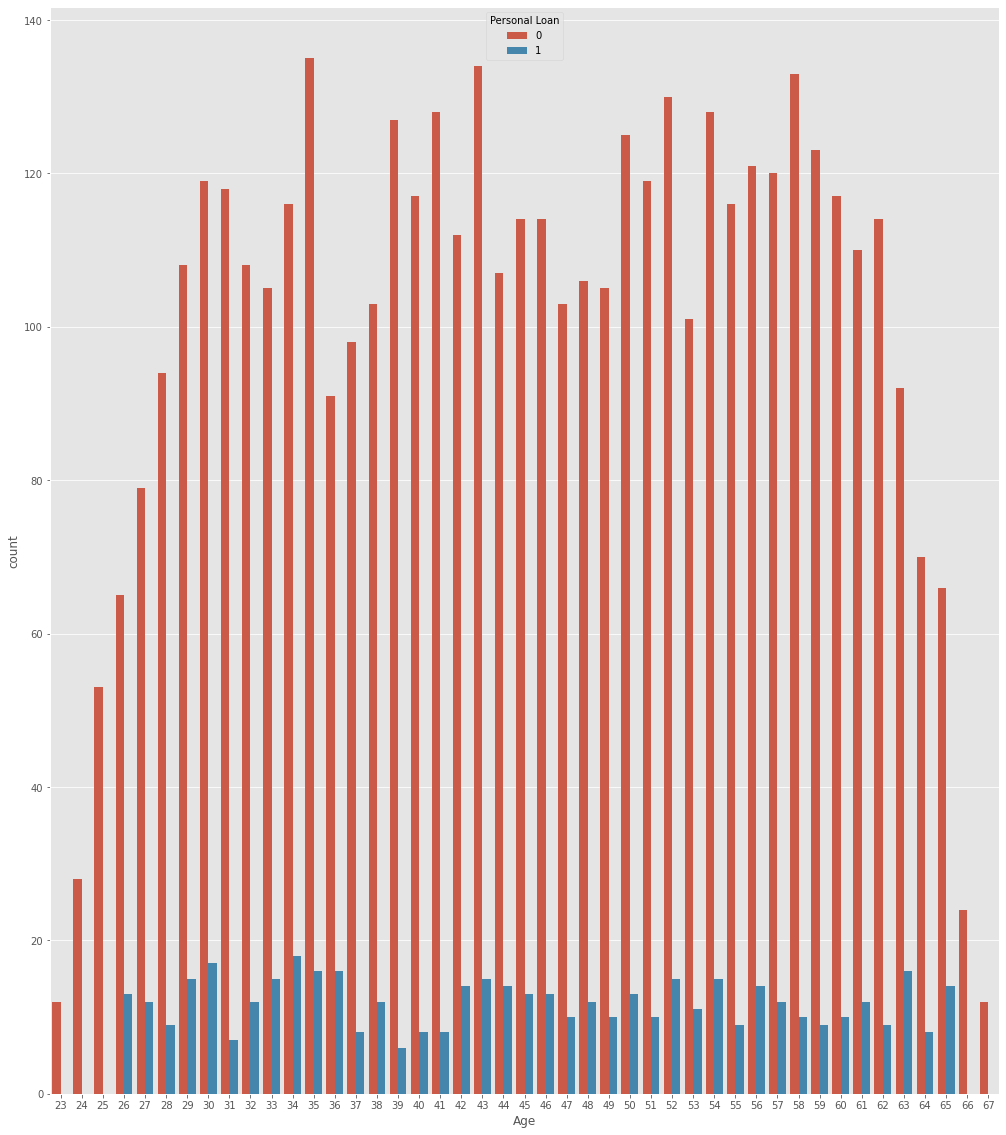

In [14]:
sns.countplot(x="Age", data=data,hue="Personal Loan")

People with age under 20 have availed the loan

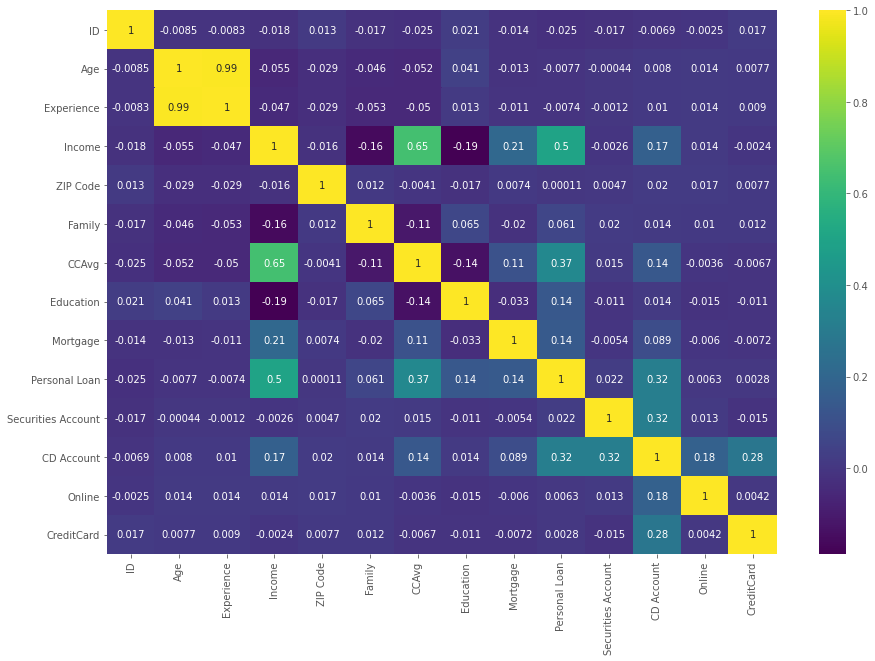

In [15]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='viridis',annot=True);

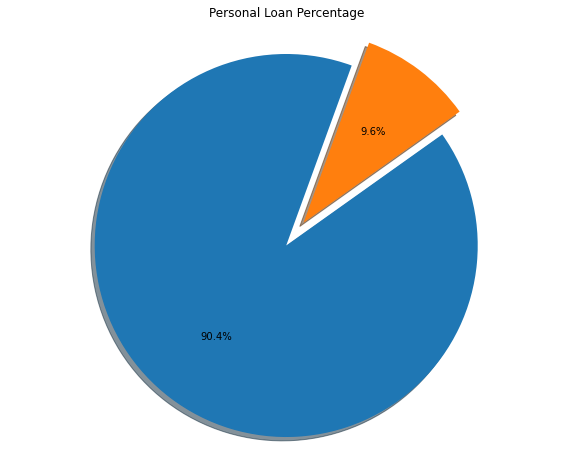

In [ ]:
DF=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

##9.6% get approved for personal loans.

In [ ]:
#9..6%people are availing loan

setting datas except loan in one var and loan in one



In [17]:
datax=data.loc[:, data.columns != "Personal Loan"]
datay=data["Personal Loan"]

In [18]:
datax.shape,datay.shape

((5000, 13), (5000,))

In [19]:
data.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True) 
 ##we drop the ID and ZIP Code columns because they are irrelevent and Experience because it is highly correleted to Age

MINMAXSCALAR


Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [24]:
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan'].values

X.shape, y.shape

((5000, 10), (5000,))

sklearn.model_selection.train_test_split





sklearn.model_selection.train_test_split(*arrays, **options)[source]
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

Read more in the User Guide.

Parameters
*arrayssequence of indexables with same length / shape[0]
Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

test_sizefloat or int, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [25]:
class_names = ['wont take loan', 'take loan']

Transformation of feature variables

Variable transformation is a way to make the data work better in your model. Data variables can have two types of form: numeric variable and categorical variable, and their transformation should have different approaches. - Numeric Variable Transformation: is turning a numeric variable to another numeric variable.


Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.[link text](https://)https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

In [27]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["Income"].values.reshape(-1,1))
t = pt.transform(datax["Income"].values.reshape(-1,1))

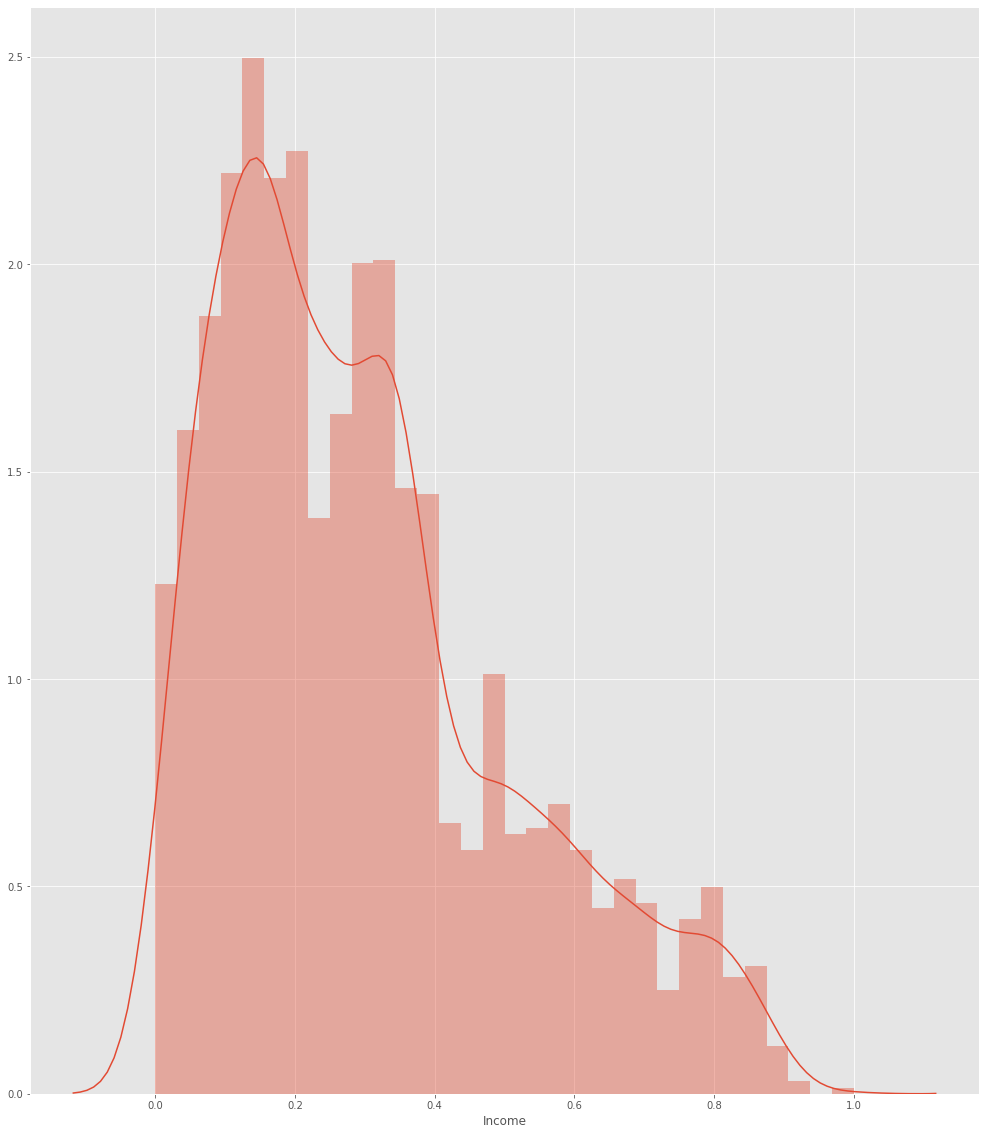

In [30]:
sns.distplot(data.Income)

In [32]:
datax['Mortgage_int'] = pd.cut(datax.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
datax.drop('Mortgage', axis=1, inplace=True)

In [33]:
datax.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,1,25,1,49,91107,4,1.6,1,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,1,0


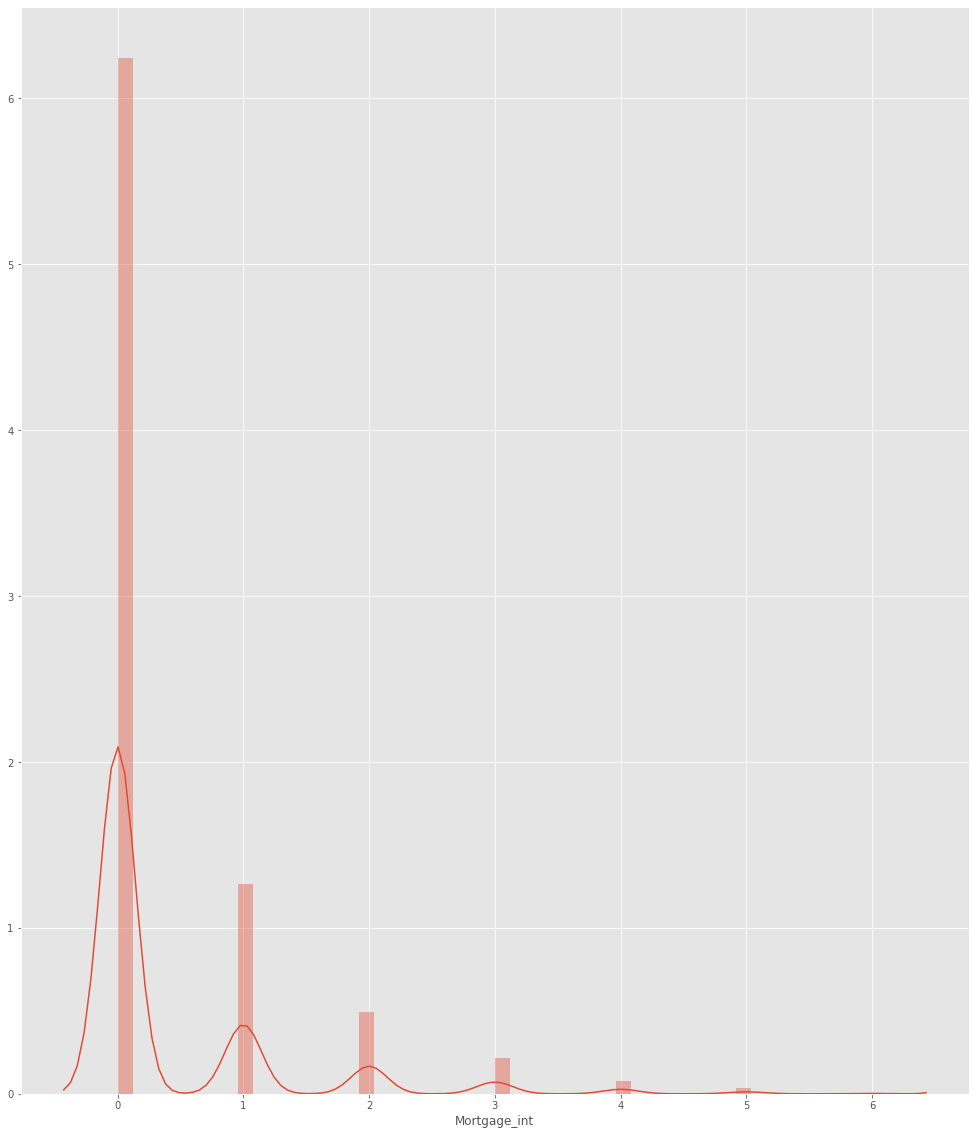

In [35]:
sns.distplot(datax.Mortgage_int)

In [ ]:
Using different prediction models




#### LOGISTIC REGRESSION





Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1"

Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.





In [36]:
from sklearn.linear_model import LogisticRegression
#logistic regression
from sklearn.ensemble import RandomForestClassifier
#random forest classifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve


In [37]:
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
class_name = ['will not take loan', 'take loan']

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.86
Recall: 0.55


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

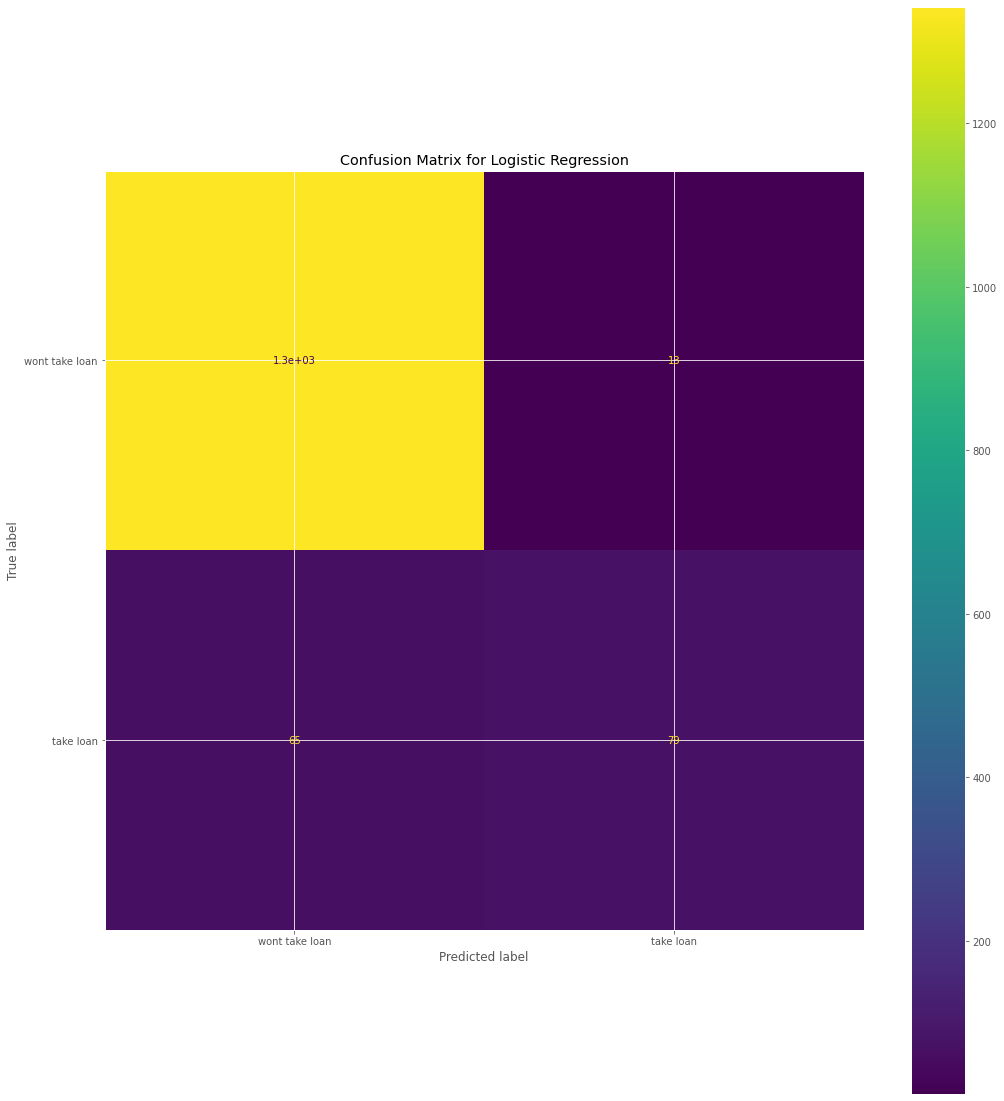

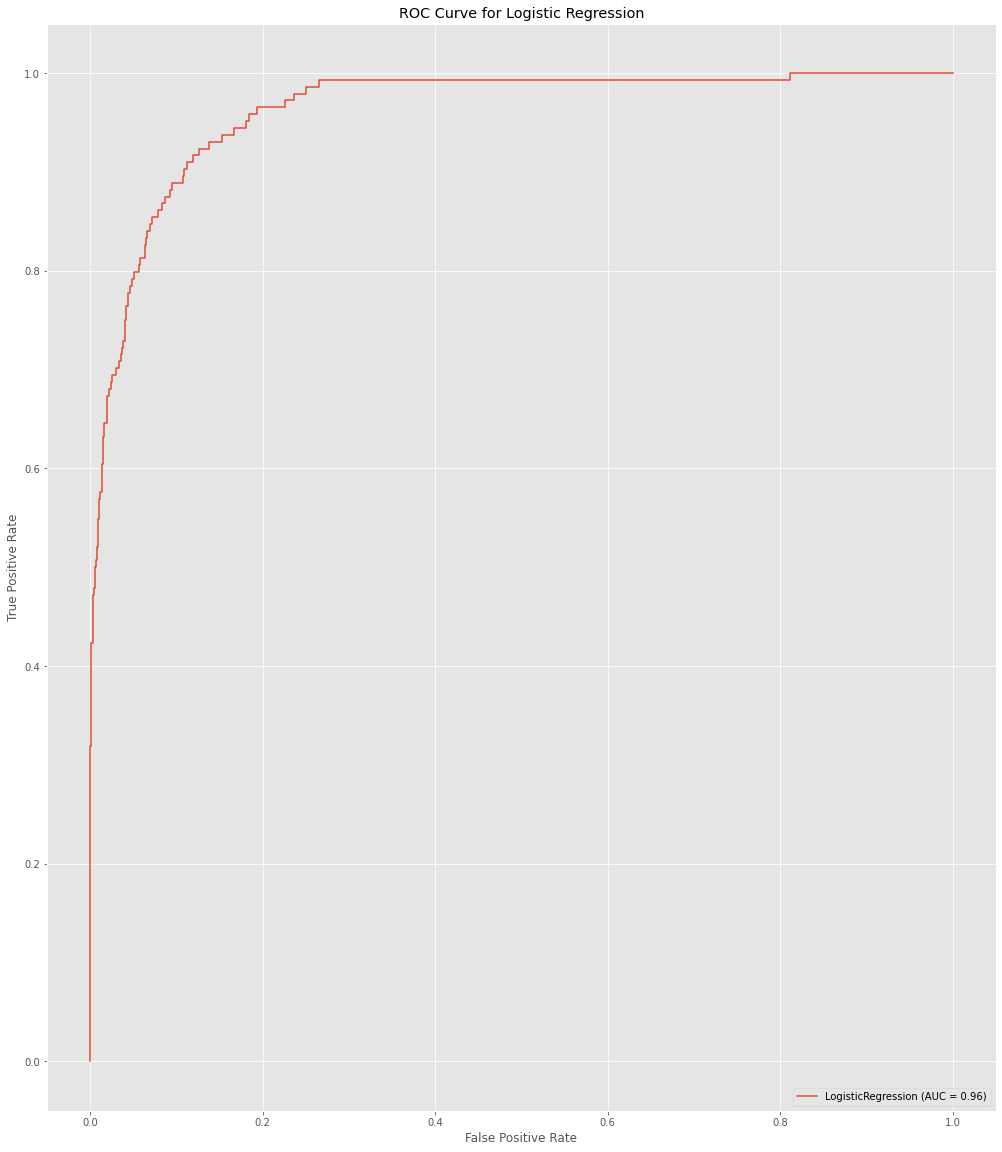

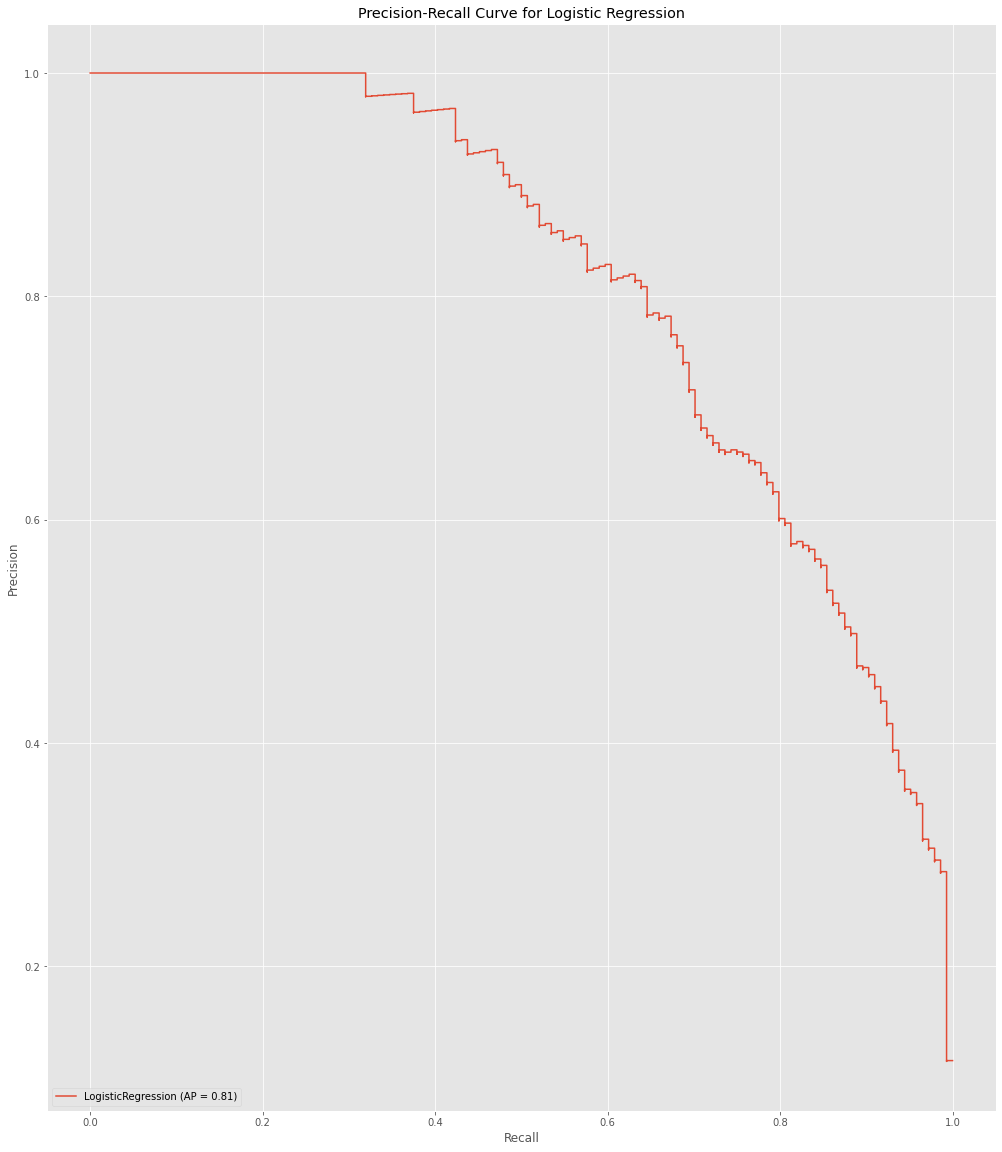

In [39]:
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

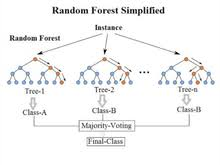#### RANDOM FOREST CLASSIFIER


Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.[1][2] Random decision forests correct for decision trees' habit of overfitting to their training set.[3]:587–588


# New Section
Random forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individua



In [43]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.95
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

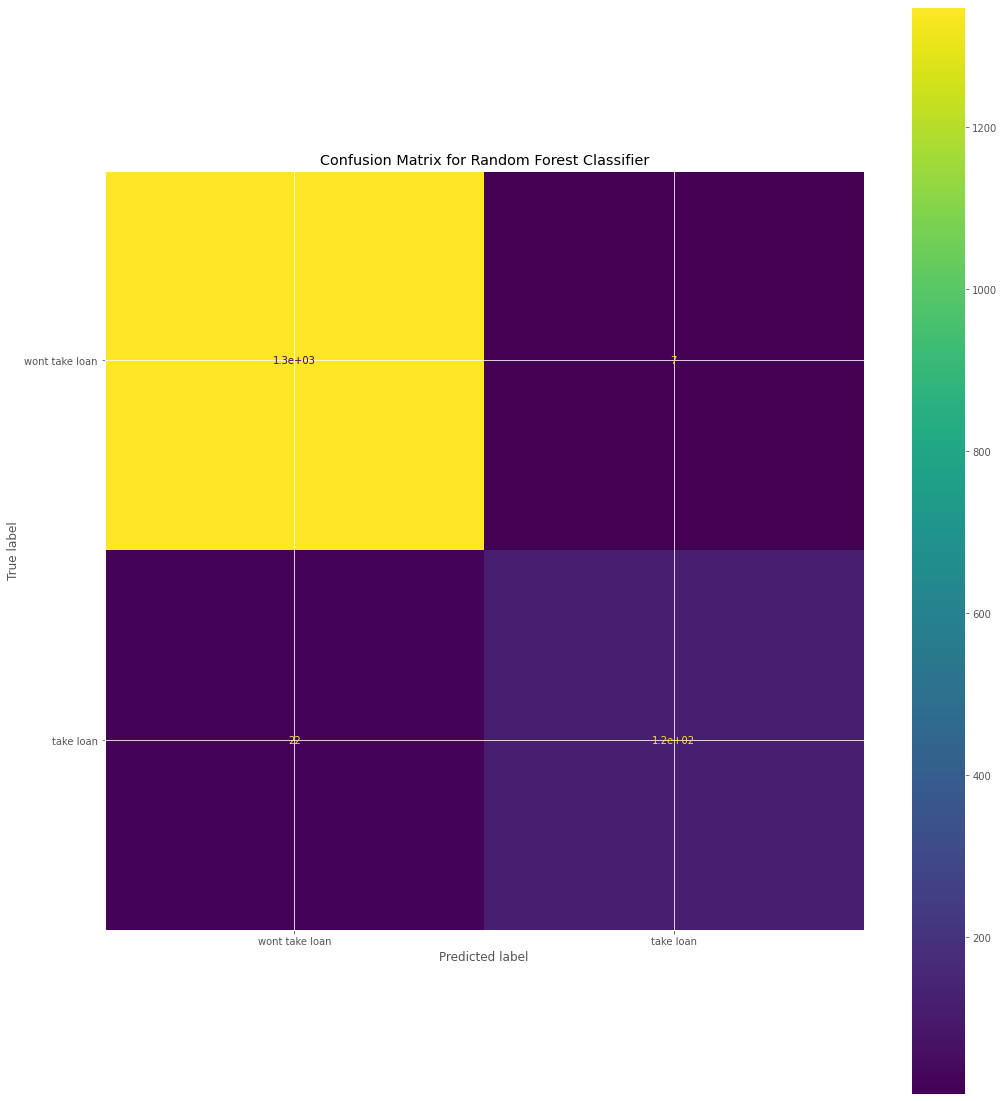

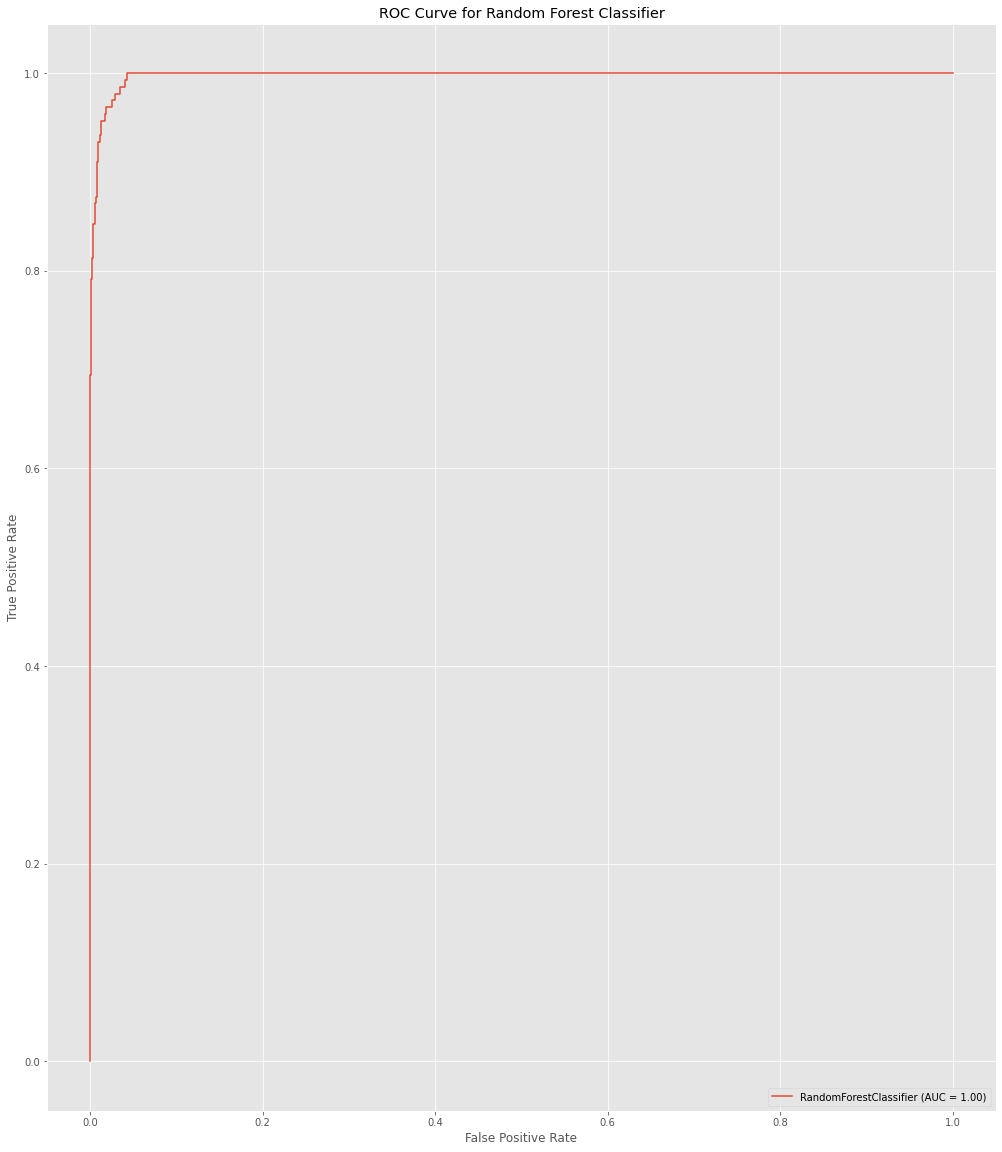

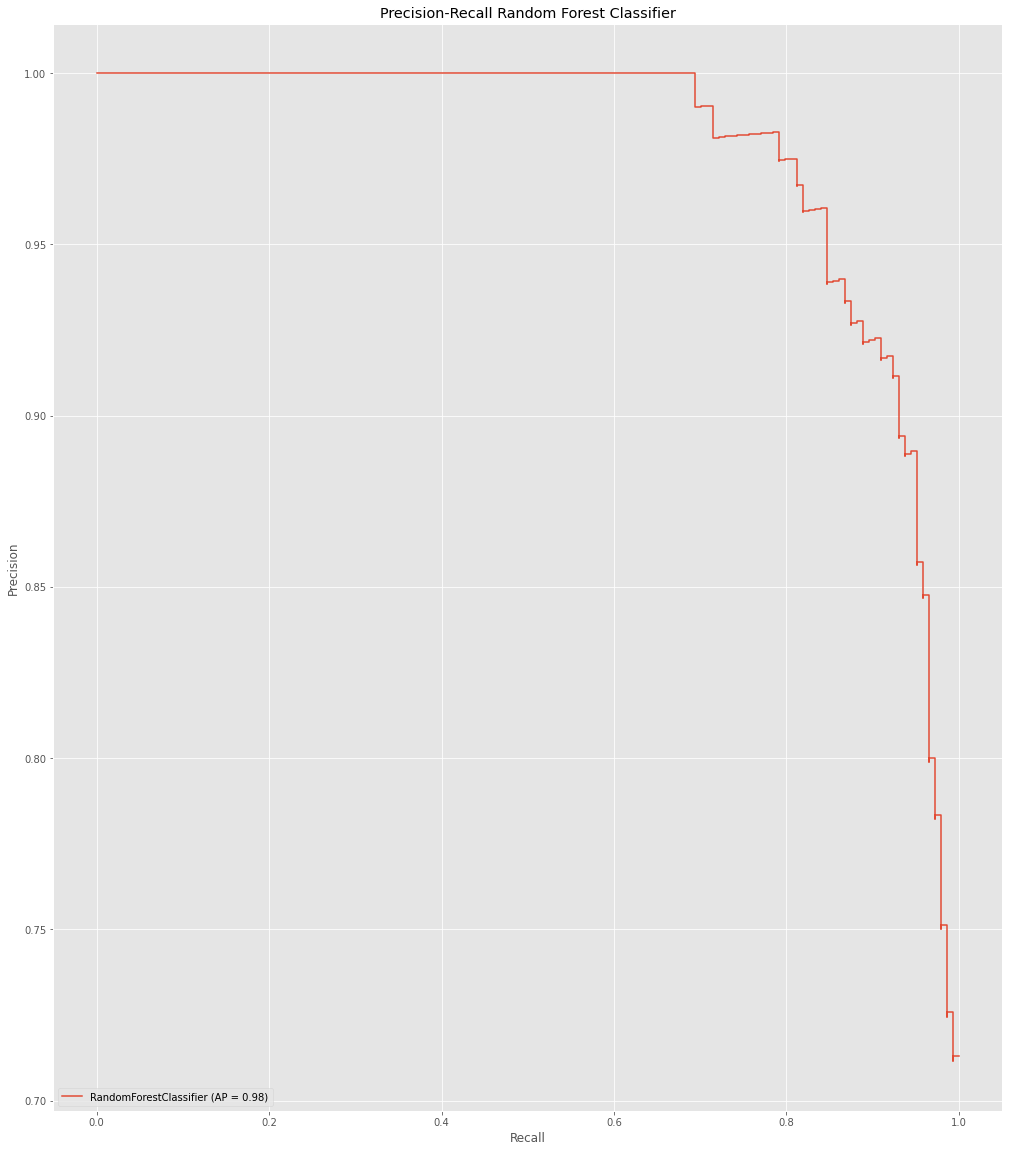

In [44]:
train_score = rfc.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rfc.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rfc.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rfc, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rfc, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

In [ ]:
## we get the best result from the random forest classifier.

# Karnott nearest neighbour

Not to be confused with k-means clustering.
Part of a series on
Machine learning
and
data mining
Problems[show]
Supervised learning
(classification • regression)[show]
Clustering[show]
Dimensionality reduction[show]
Structured prediction[show]
Anomaly detection[show]
Artificial neural network[show]
Reinforcement learning[show]
Theory[show]
Machine-learning venues[show]
Glossary of artificial intelligence[show]
Related articles[show]
vte
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(X_train, y_train)
y_pred=k.predict(X_test)

Training Accuracy: 0.95
Testing Accuracy: 0.94
Precision: 0.94
Recall: 0.42


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

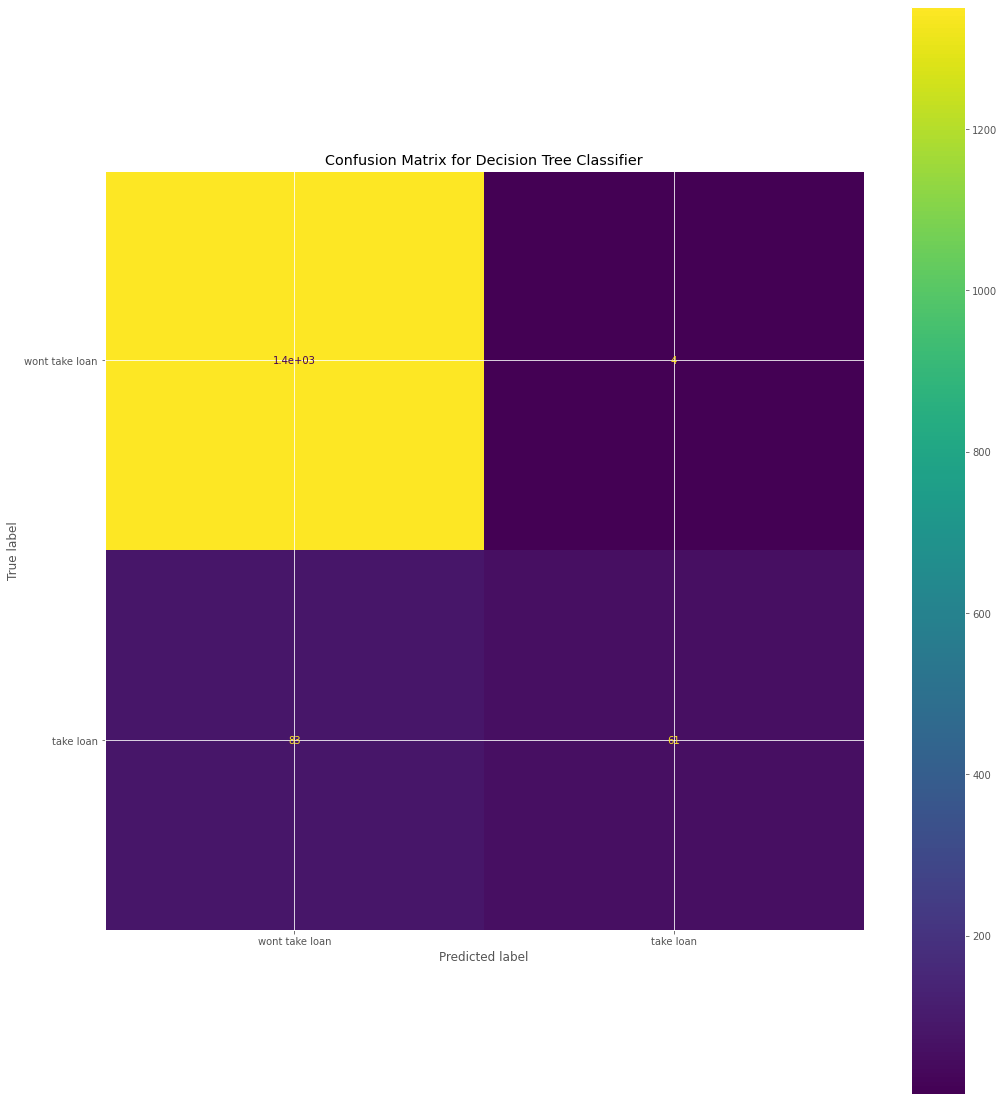

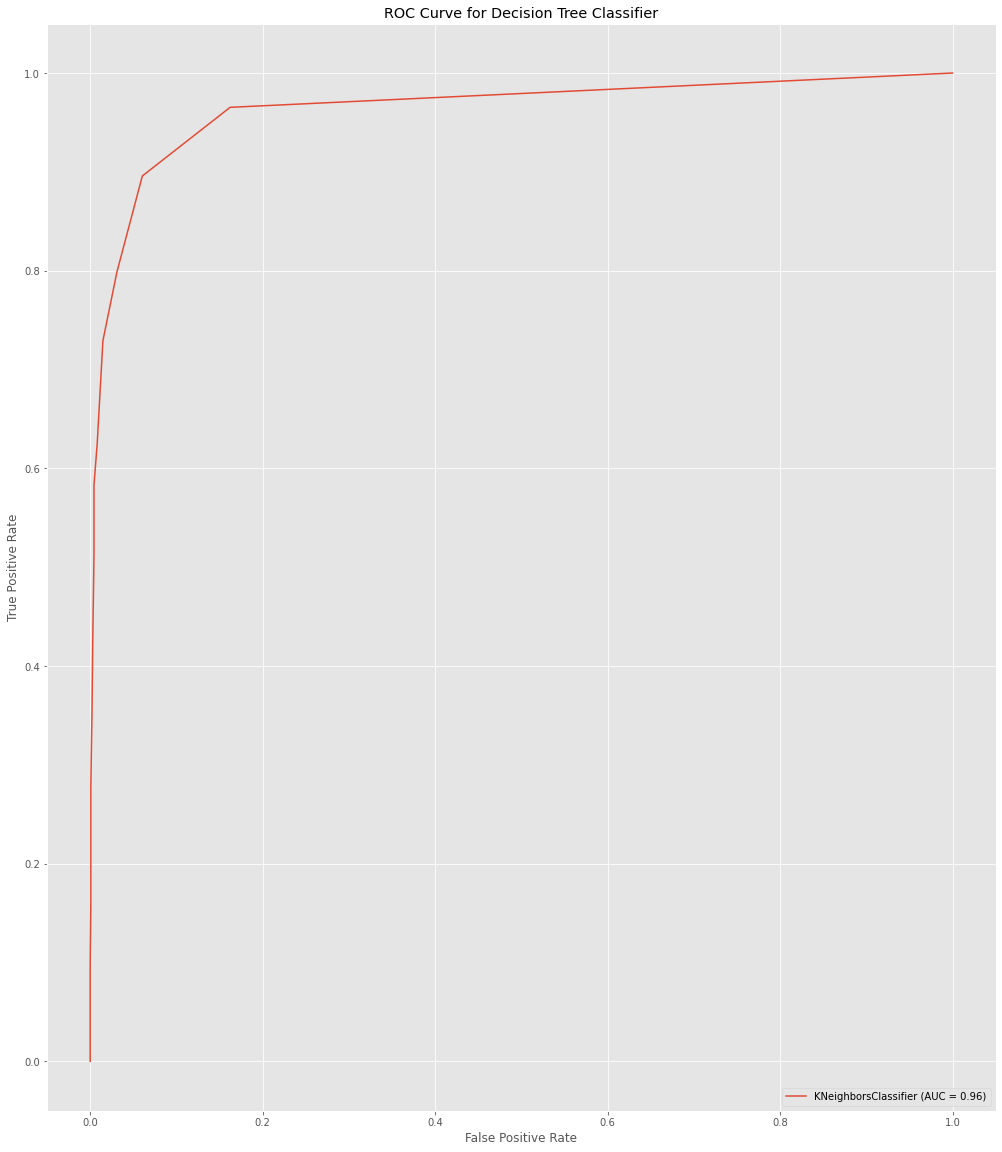

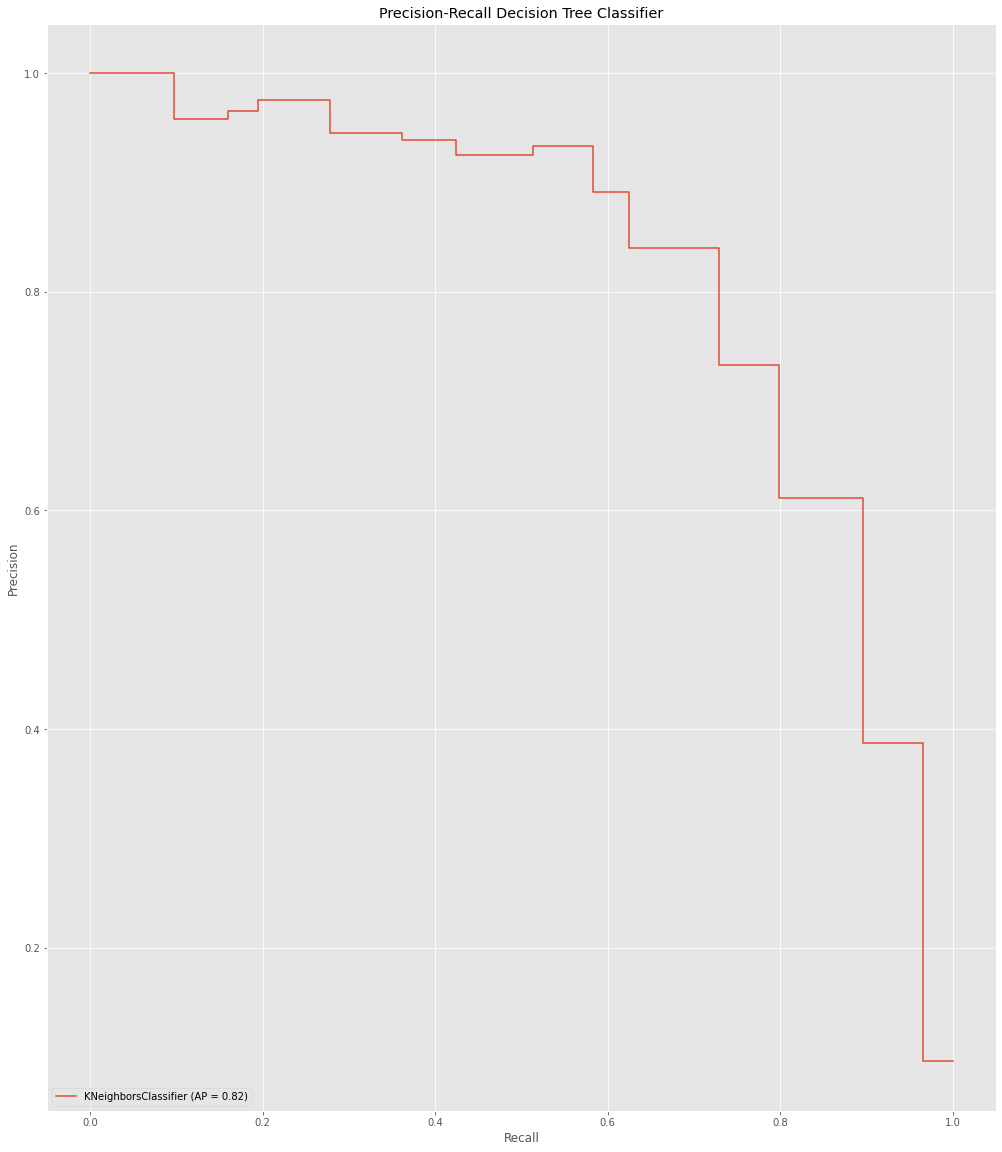

In [47]:
train_score = k.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score( y_test, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score( y_test, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k,X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k,X_test, y_test)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, X_test, y_test)
plt.title('Precision-Recall Decision Tree Classifier')